In [13]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from utils import read_data
import seaborn as sns
import pandas as pd

In [14]:
params = {
    "p2_bad1": {"mode": "TEST", "modelName": "p2", "folderName": "2024-01-05-13-38-20"},
    "p2_bad2": {"mode": "TEST", "modelName": "p2", "folderName": "2024-01-05-13-37-55"},
    "p2_good": {"mode": "TEST", "modelName": "p2", "folderName": "2024-01-05-13-38-01"},
    "p4_bad1": {"mode": "TEST", "modelName": "p4", "folderName": "2024-01-05-13-38-48"},
    "p4_bad2": {"mode": "TEST", "modelName": "p4", "folderName": "2024-01-05-13-39-29"},
    "p4_good": {"mode": "TEST", "modelName": "p4", "folderName": "2024-01-05-13-38-57"},
    "p8_bad1": {"mode": "TEST", "modelName": "p8", "folderName": "2024-01-05-13-40-16"},
    "p8_bad2": {"mode": "TEST", "modelName": "p8", "folderName": "2024-01-05-13-39-51"},
    "p8_good": {"mode": "TEST", "modelName": "p8", "folderName": "2024-01-05-13-39-53"},
    "p16_bad1": {
        "mode": "TEST",
        "modelName": "p16",
        "folderName": "2024-01-05-13-31-06",
    },
    "p16_bad2": {
        "mode": "TEST",
        "modelName": "p16",
        "folderName": "2024-01-05-13-31-17",
    },
    "p16_good": {
        "mode": "TEST",
        "modelName": "p16",
        "folderName": "2024-01-05-13-29-37",
    },
    "m1_bad1": {"mode": "TEST", "modelName": "m1", "folderName": "2024-01-06-05-07-52"},
    "m1_bad2": {"mode": "TEST", "modelName": "m1", "folderName": "2024-01-06-05-08-14"},
    "m1_good": {"mode": "TEST", "modelName": "m1", "folderName": "2024-01-05-13-33-02"},
    "m2_bad1": {"mode": "TEST", "modelName": "m2", "folderName": "2024-01-06-05-09-00"},
    "m2_bad2": {"mode": "TEST", "modelName": "m2", "folderName": "2024-01-06-05-08-32"},
    "m2_good": {"mode": "TEST", "modelName": "m2", "folderName": "2024-01-06-05-09-05"},
    "m4_bad1": {"mode": "TEST", "modelName": "m4", "folderName": "2024-01-06-05-09-45"},
    "m4_bad2": {"mode": "TEST", "modelName": "m4", "folderName": "2024-01-06-05-09-50"},
    "m4_good": {"mode": "TEST", "modelName": "m4", "folderName": "2024-01-06-05-09-29"},
    "m8_bad1": {"mode": "TEST", "modelName": "m8", "folderName": "2024-01-06-05-10-57"},
    "m8_bad2": {"mode": "TEST", "modelName": "m8", "folderName": "2024-01-06-05-11-05"},
    "m8_good": {"mode": "TEST", "modelName": "m8", "folderName": "2024-01-06-05-10-38"},
    "m16_bad1": {
        "mode": "TEST",
        "modelName": "m16",
        "folderName": "2024-01-05-13-34-04",
    },
    "m16_bad2": {
        "mode": "TEST",
        "modelName": "m16",
        "folderName": "2024-01-05-13-34-35",
    },
    "m16_good": {
        "mode": "TEST",
        "modelName": "m16",
        "folderName": "2024-01-05-13-34-06",
    },
    "m32_bad1": {
        "mode": "TEST",
        "modelName": "m32",
        "folderName": "2024-01-05-13-35-16",
    },
    "m32_bad2": {
        "mode": "TEST",
        "modelName": "m32",
        "folderName": "2024-01-05-13-35-30",
    },
    "m32_good": {
        "mode": "TEST",
        "modelName": "m32",
        "folderName": "2024-01-05-13-35-02",
    },
}

In [15]:
def run_plot(param):
    modelName = params[param]["modelName"]
    mode = params[param]["mode"]
    folderName = params[param]["folderName"]

    if mode == "TRAIN":
        sourceFolder = "o7_analyze_train"
    elif mode == "TEST":
        sourceFolder = "o7_analyze_test"
    else:
        raise ValueError("Unknown mode")
    sourceFolder = os.path.join(sourceFolder, modelName)

    cwd = sys.path[0]
    outputFolderPath = os.path.join(cwd, sourceFolder)
    folderPath = os.path.join(outputFolderPath, folderName)
    data_pickle, data_json = read_data(folderPath)

    print(data_json["s7"])
    X_pred = data_pickle["X_pred"]
    X_true = data_pickle["X_true"]
    tArrayPred = data_pickle["tArrayPred"]
    mseArray = data_pickle["mseArray"]
    dx = data_json["s2"]["dx"]
    L = data_json["s2"]["L"]

    sns.set_theme()
    filenamePrefix = "phi-compared"

    minV = X_pred[-1, :].min()
    maxV = X_pred[-1, :].max()
    minV = minV - abs(maxV) * 0.2
    maxV = maxV + abs(maxV) * 0.2
    xp = np.arange(0, L, dx)

    markerTypes = (
        "o",
        "v",
        "^",
        "<",
        ">",
        "8",
        "s",
        "p",
        "*",
        "h",
        "H",
        "D",
        "d",
        "P",
        "X",
    )

    nFig = 3
    idxTSample = np.floor(np.linspace(1, tArrayPred.shape[0] - 1, nFig)).astype(int)
    for idx, t in enumerate(idxTSample):
        fig, ax = plt.subplots(figsize=(10, 3))
        tTime = tArrayPred[t]
        ax.plot(xp, X_true[t, :], marker="o", label=f"Ground Truth")
        ax.plot(xp, X_pred[t, :], marker="v", label=f"Prediction")
        ax.set_title(f"{modelName}, t = {tTime:.2f}")
        ax.set_ylim([minV, maxV])
        ax.set_xlabel("x")
        ax.set_ylabel("Atomic Density")
        ax.set_xlim([0, L])
        plt.legend(loc="upper right")
        tTimeFmt = f"{tTime:2.1f}".replace(".", "_")
        filename = f"{filenamePrefix}-{param}-{modelName}-t{tTimeFmt}.png"
        filePath = os.path.join(os.getcwd(), "o8_visualize", filename)
        plt.savefig(filePath, dpi=300, bbox_inches="tight")

{'mse': 0.08499517338417194, 'mape': 0.20540971115810505, 'mode': 'TEST', 'modelName': 'p2', 'folderName': '2024-01-05-12-12-54', 'sourceFolder': 'o3_pfc_test/p2'}
{'mse': 0.0015474738765482445, 'mape': 0.027747457568766974, 'mode': 'TEST', 'modelName': 'p2', 'folderName': '2024-01-05-12-13-11', 'sourceFolder': 'o3_pfc_test/p2'}
{'mse': 4.374202812227659e-06, 'mape': 0.0009046721769849, 'mode': 'TEST', 'modelName': 'p2', 'folderName': '2024-01-05-12-13-05', 'sourceFolder': 'o3_pfc_test/p2'}
{'mse': 0.10732168478908764, 'mape': 0.24651838349667157, 'mode': 'TEST', 'modelName': 'p4', 'folderName': '2024-01-05-12-14-02', 'sourceFolder': 'o3_pfc_test/p4'}
{'mse': 0.004300882801232462, 'mape': 0.04418896463870451, 'mode': 'TEST', 'modelName': 'p4', 'folderName': '2024-01-05-12-13-55', 'sourceFolder': 'o3_pfc_test/p4'}
{'mse': 4.14544121043364e-05, 'mape': 0.002735520058124429, 'mode': 'TEST', 'modelName': 'p4', 'folderName': '2024-01-05-12-14-13', 'sourceFolder': 'o3_pfc_test/p4'}
{'mse': 0

/tmp/ipykernel_13224/3142268815.py:57: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(10, 3))


{'mse': 0.017109850735790272, 'mape': 0.10440137031188479, 'mode': 'TEST', 'modelName': 'p8', 'folderName': '2024-01-05-12-15-24', 'sourceFolder': 'o3_pfc_test/p8'}
{'mse': 0.0002461048601547529, 'mape': 0.00641309531145386, 'mode': 'TEST', 'modelName': 'p8', 'folderName': '2024-01-05-12-15-11', 'sourceFolder': 'o3_pfc_test/p8'}
{'mse': 0.1259249641539359, 'mape': 0.302807894199868, 'mode': 'TEST', 'modelName': 'p16', 'folderName': '2024-01-05-12-16-05', 'sourceFolder': 'o3_pfc_test/p16'}
{'mse': 0.11733755536616475, 'mape': 0.28034196224584174, 'mode': 'TEST', 'modelName': 'p16', 'folderName': '2024-01-05-12-15-59', 'sourceFolder': 'o3_pfc_test/p16'}
{'mse': 0.041934933794994356, 'mape': 0.15382180376873075, 'mode': 'TEST', 'modelName': 'p16', 'folderName': '2024-01-05-12-16-01', 'sourceFolder': 'o3_pfc_test/p16'}
{'mse': 0.21078641057156292, 'mape': 0.38338384290909405, 'mode': 'TEST', 'modelName': 'm1', 'folderName': '2024-01-05-14-26-55', 'sourceFolder': 'o6_ml_test/m1'}
{'mse': 0.

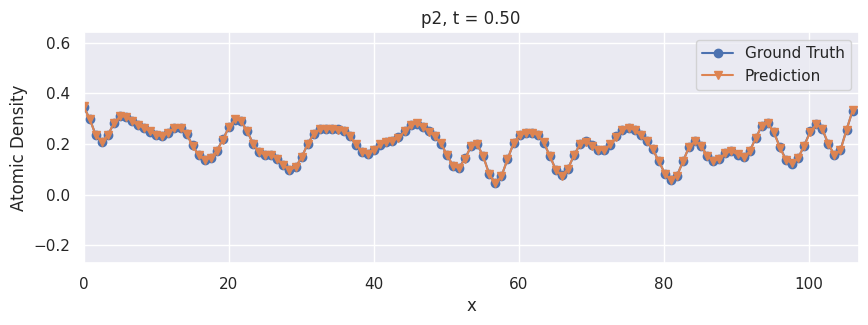

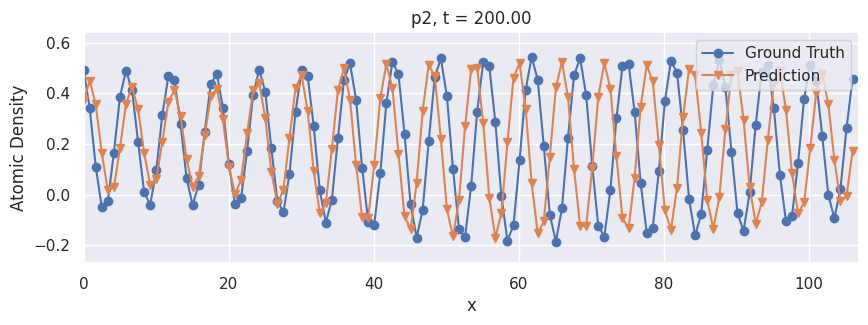

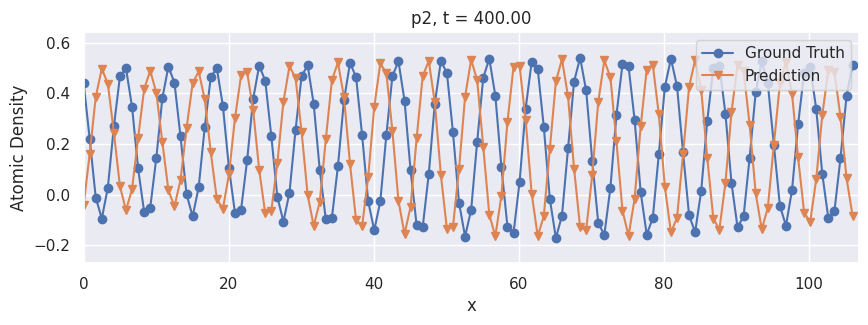

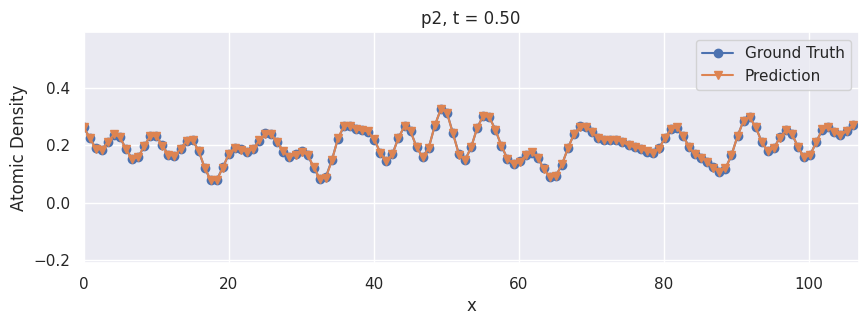

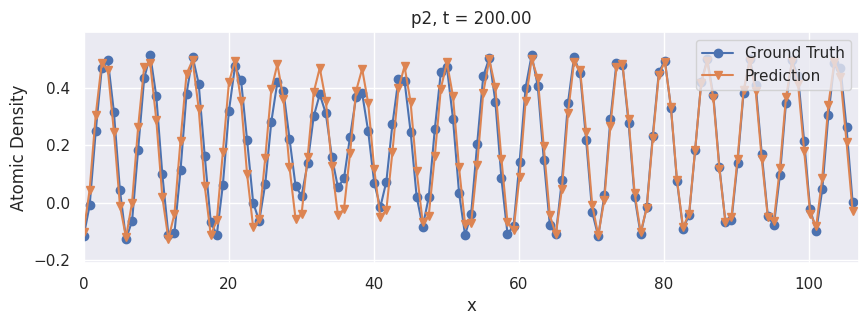

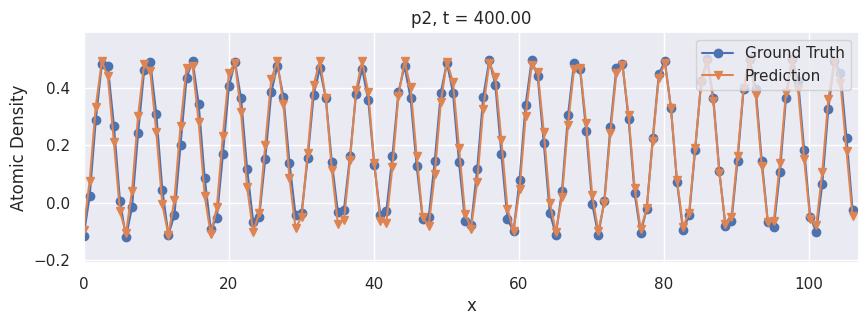

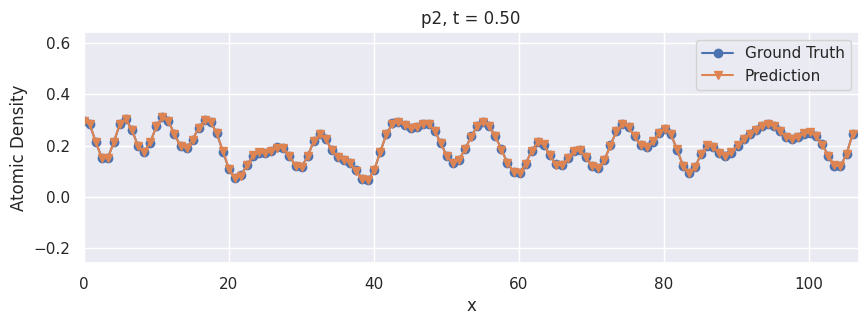

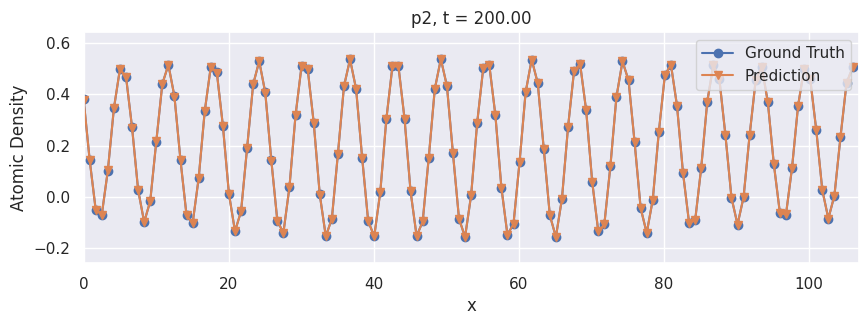

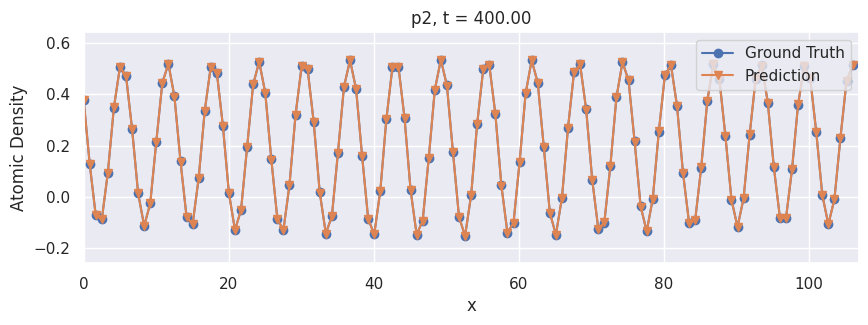

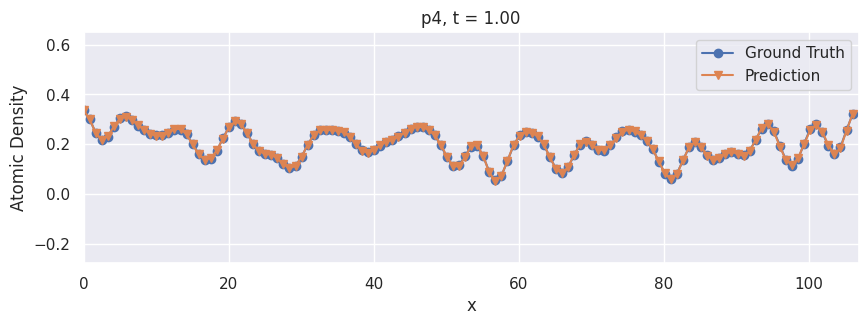

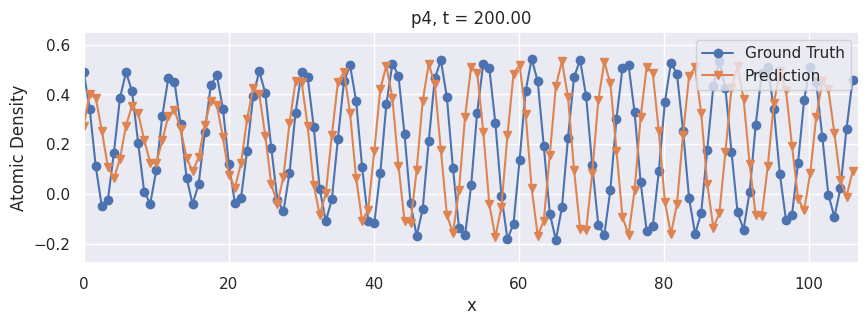

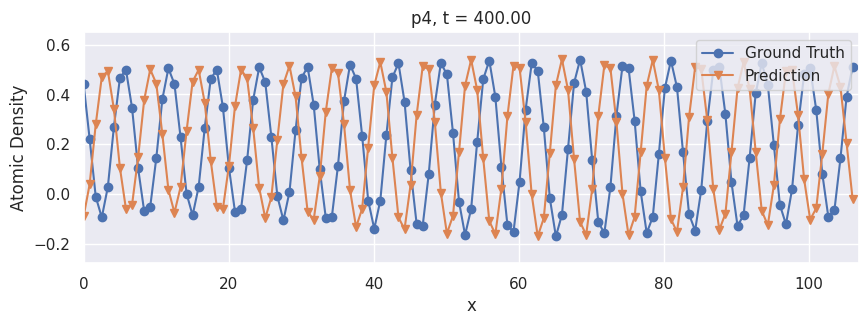

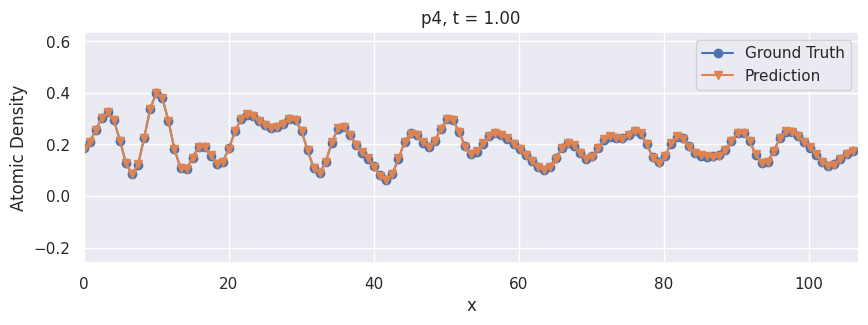

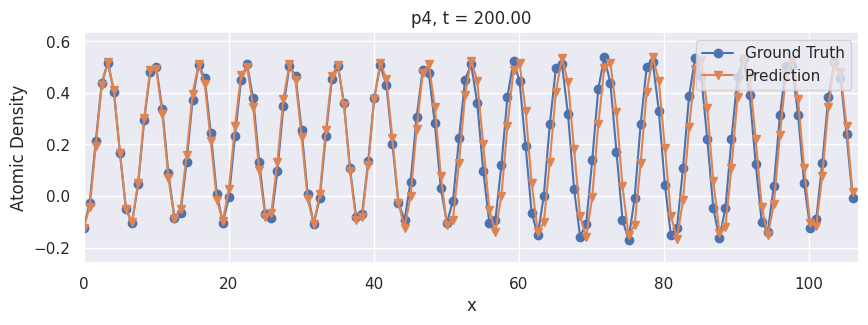

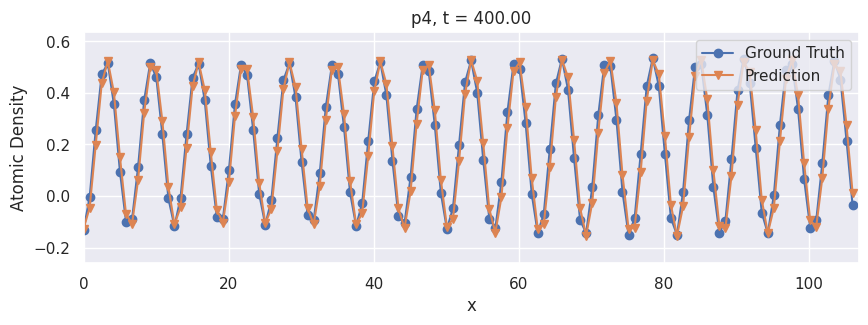

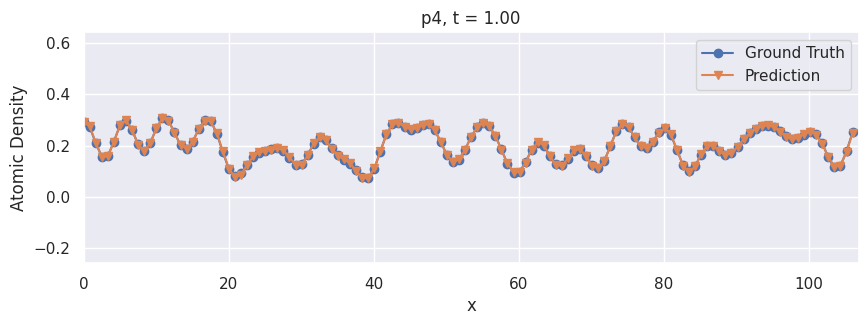

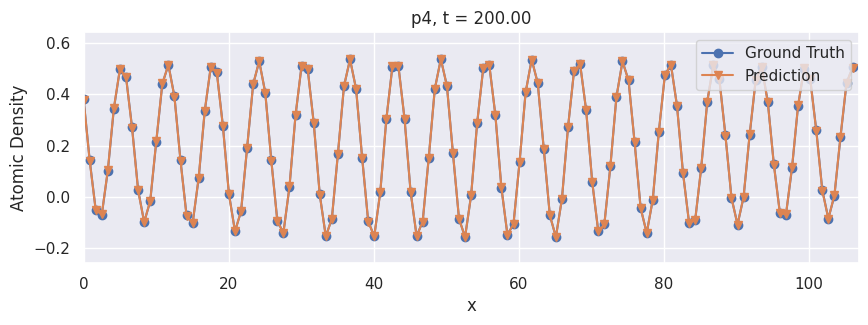

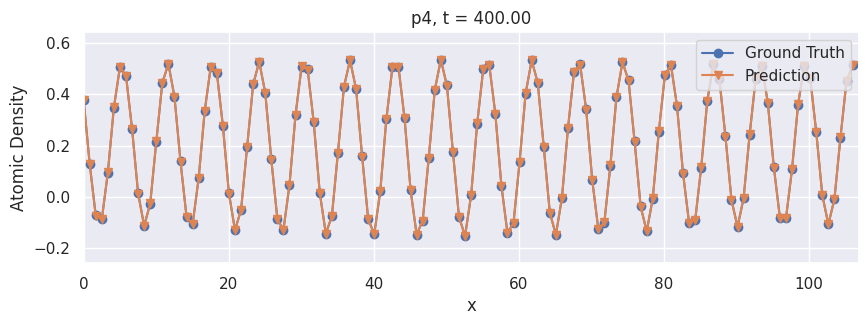

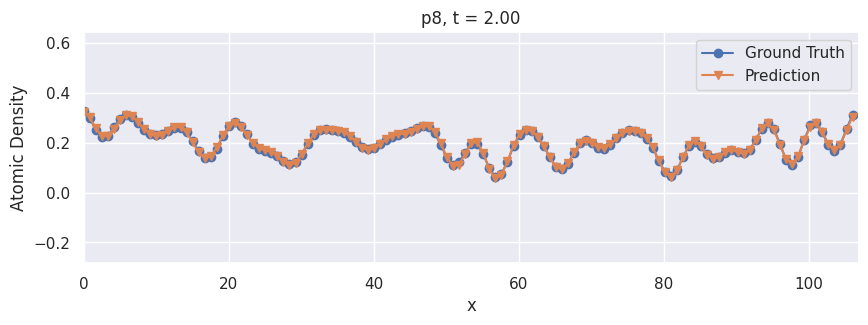

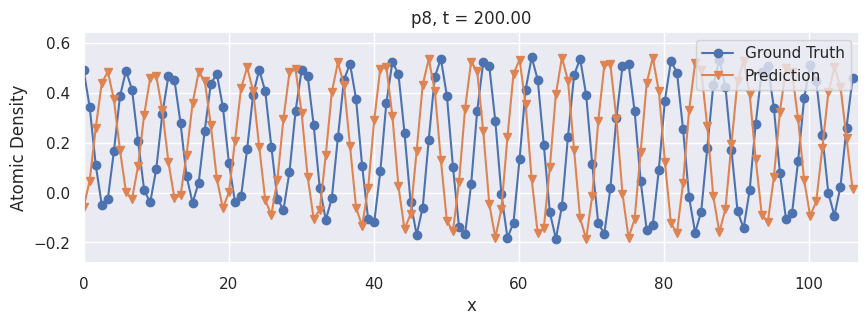

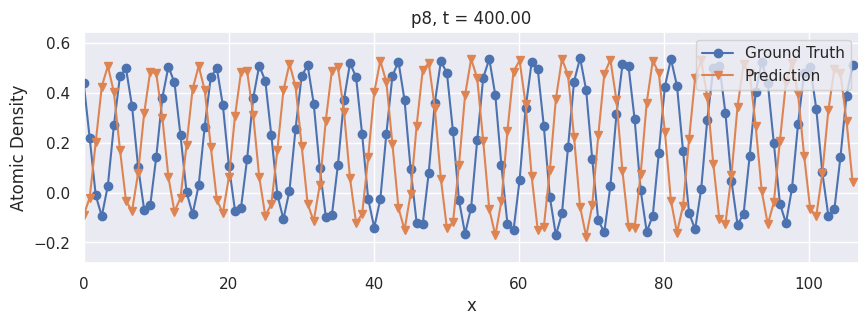

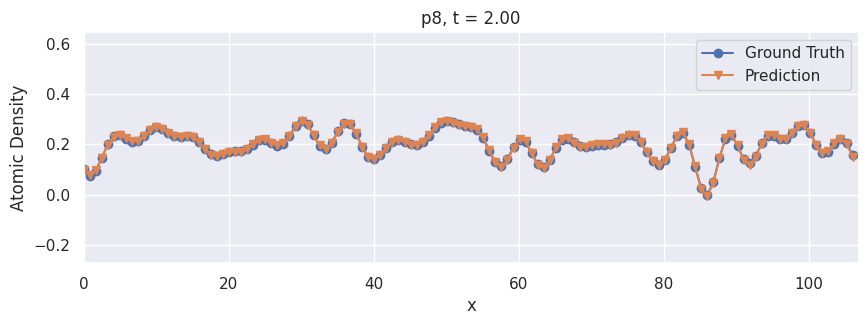

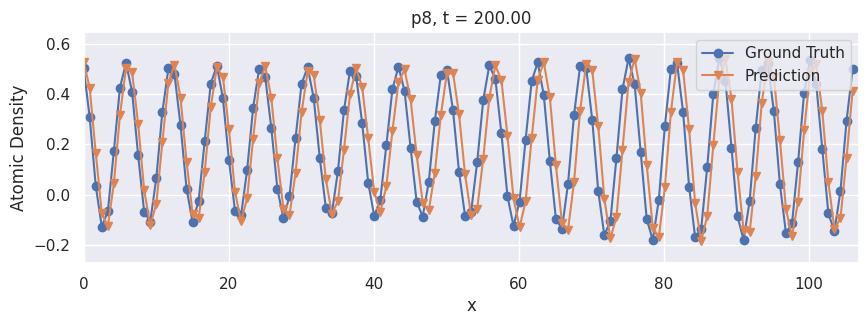

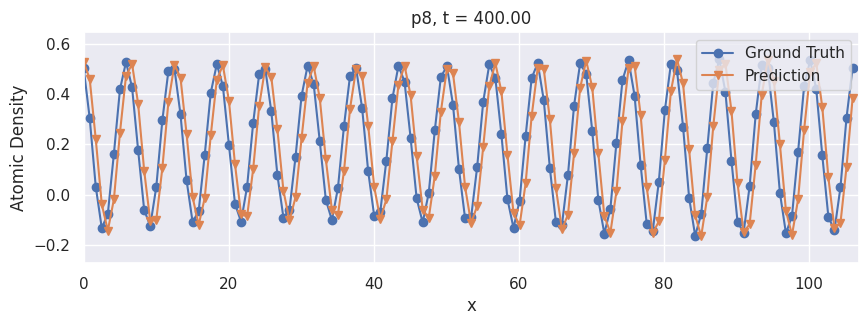

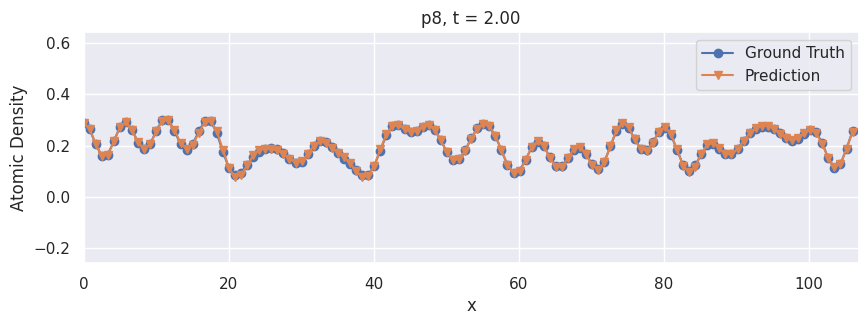

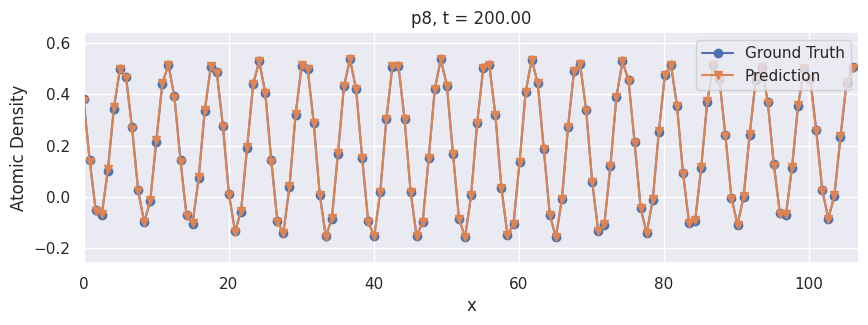

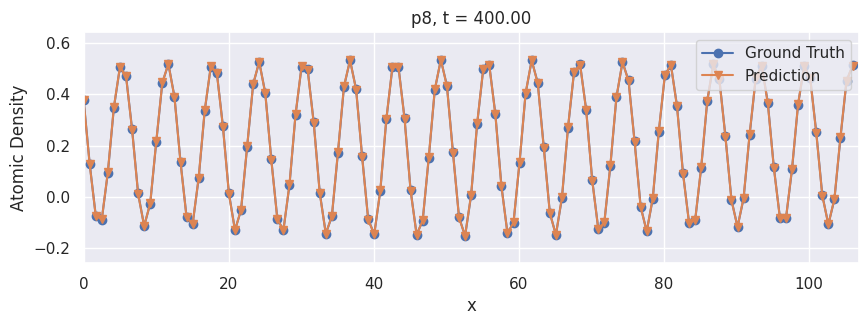

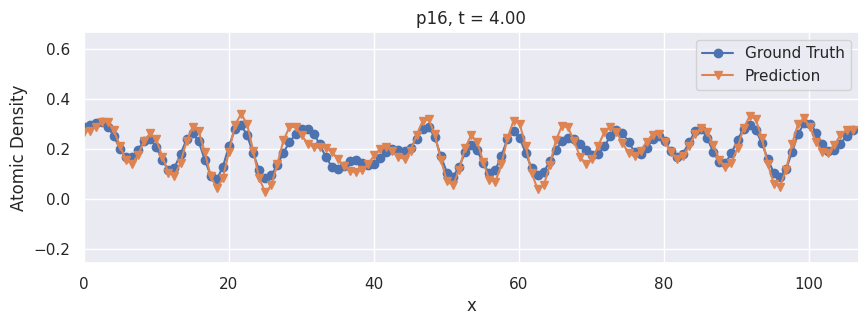

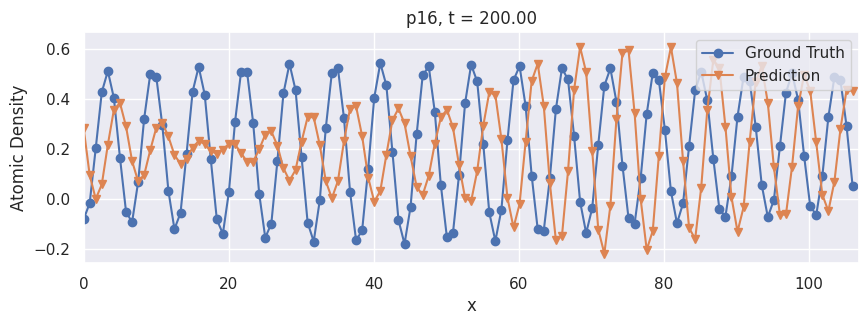

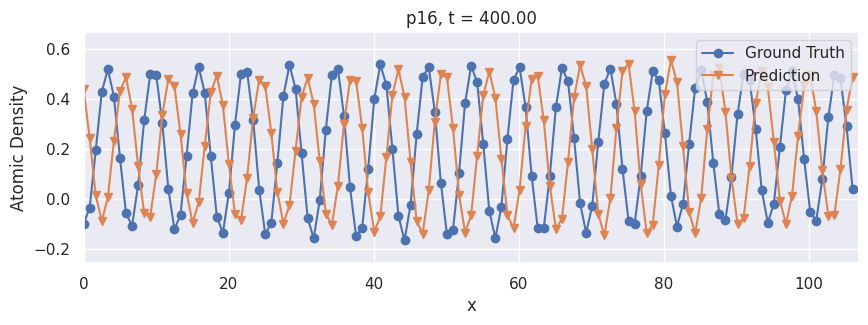

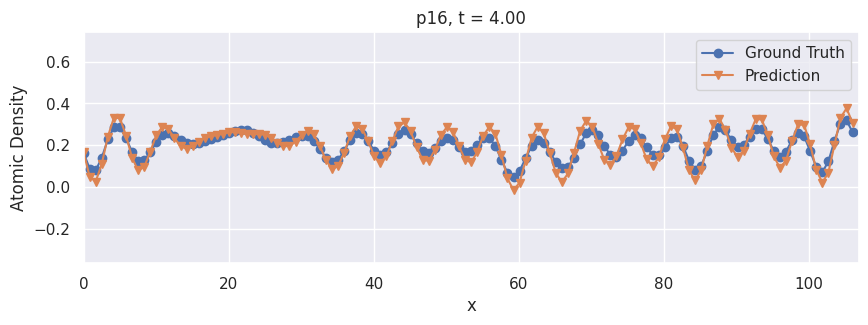

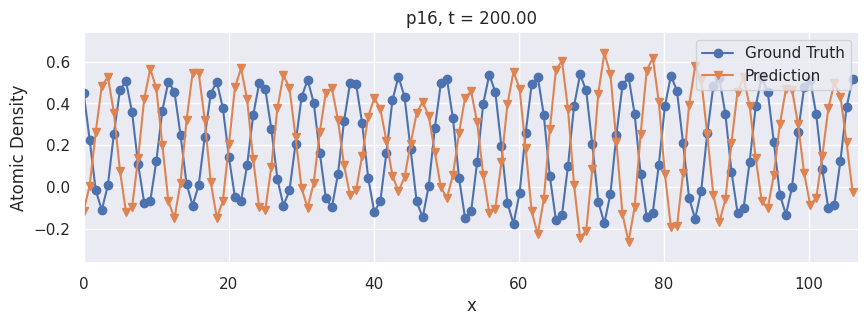

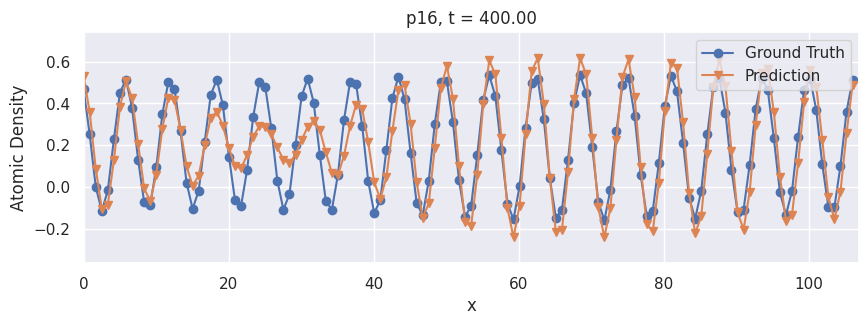

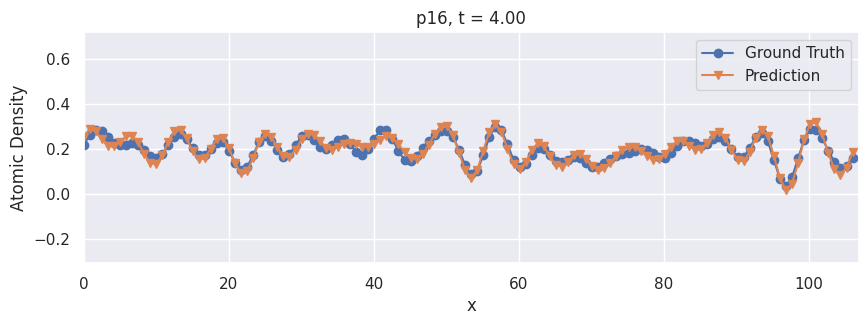

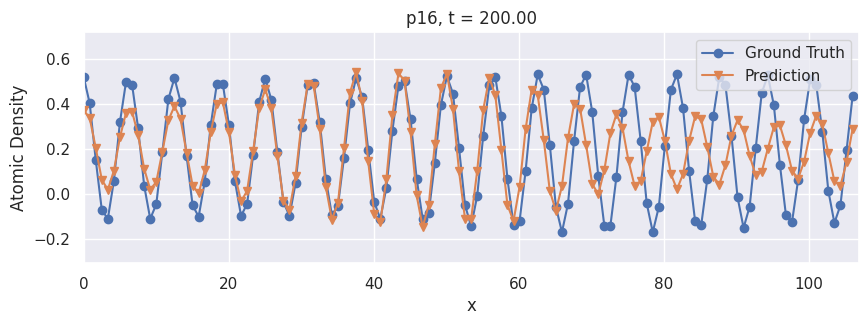

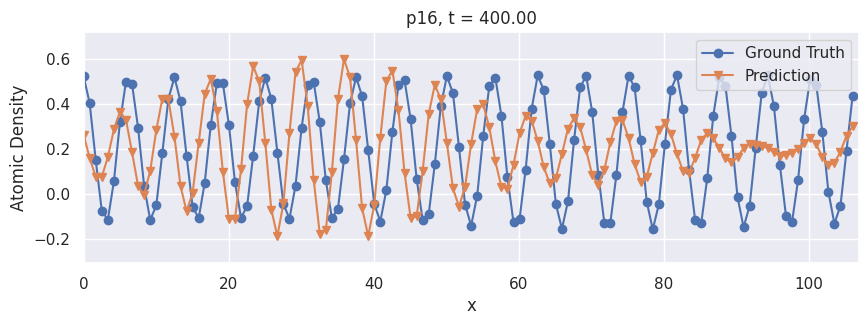

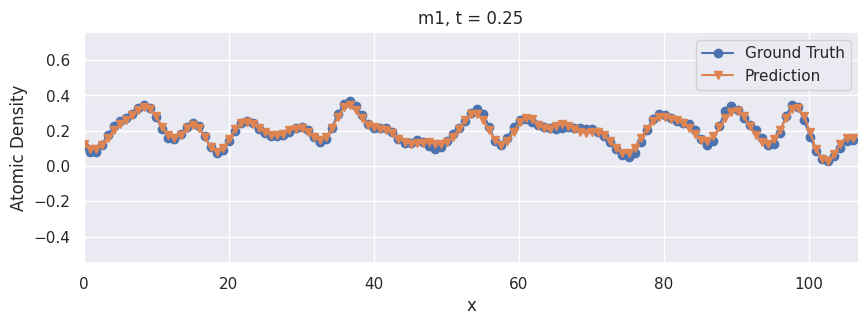

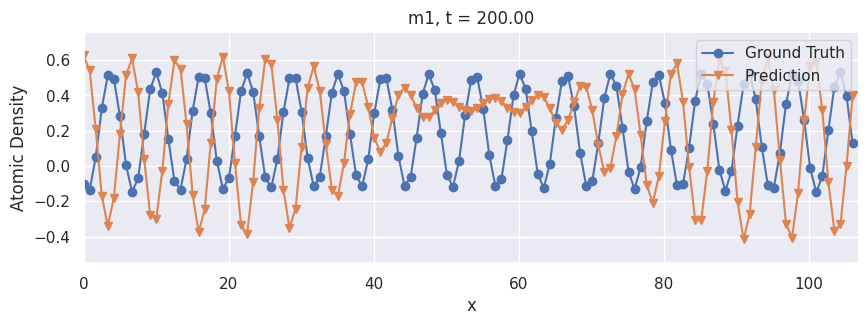

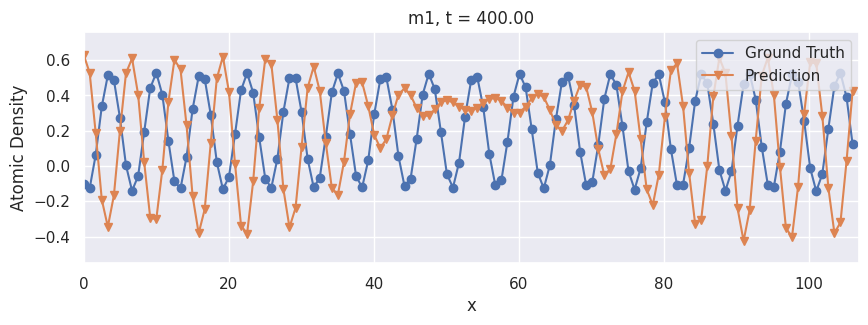

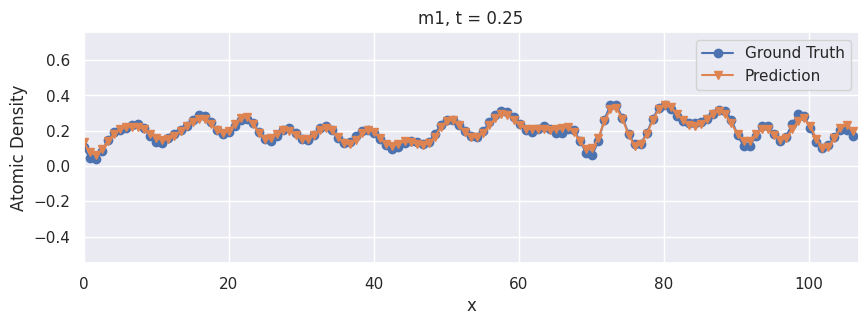

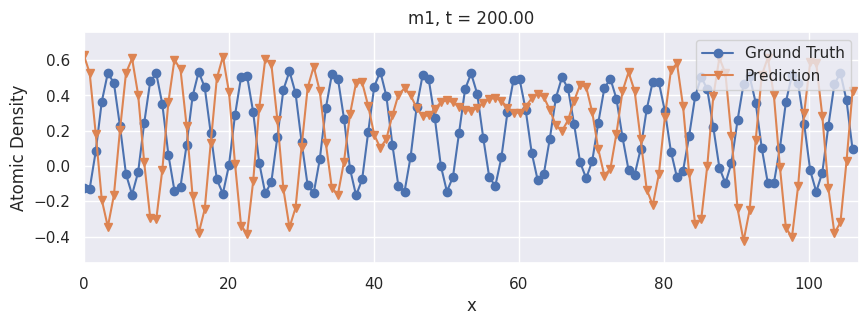

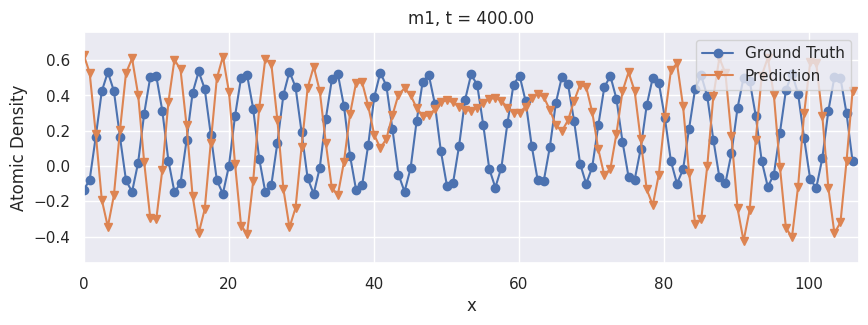

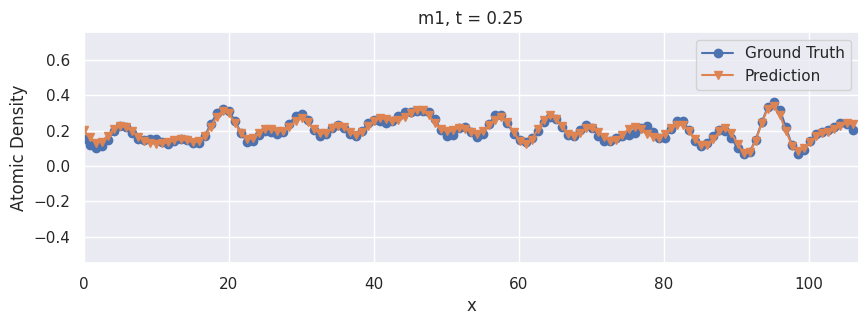

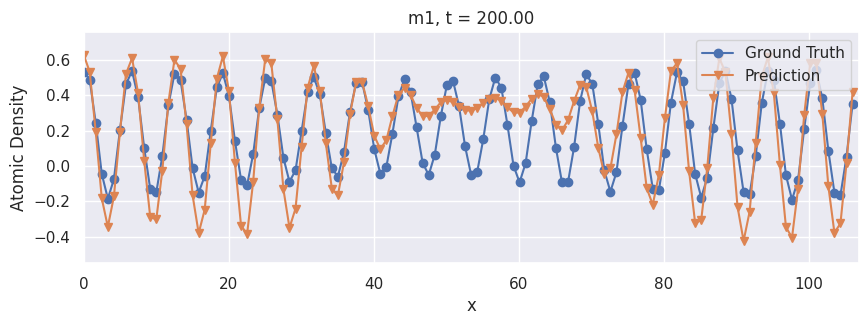

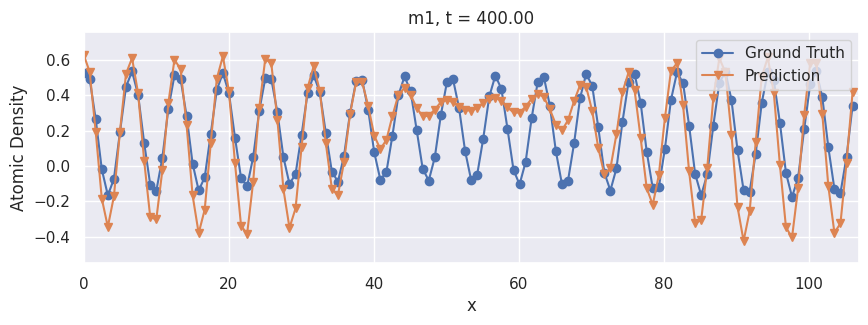

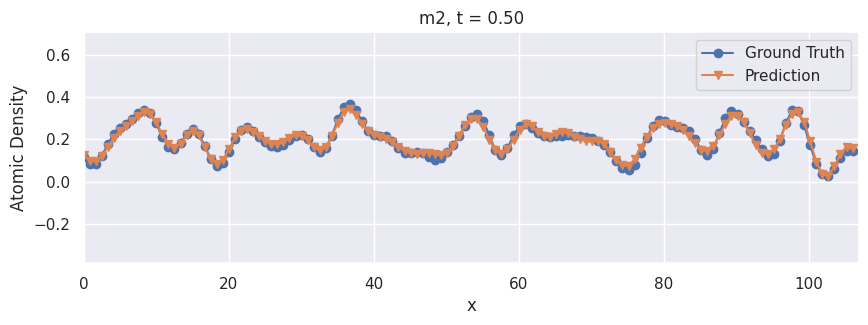

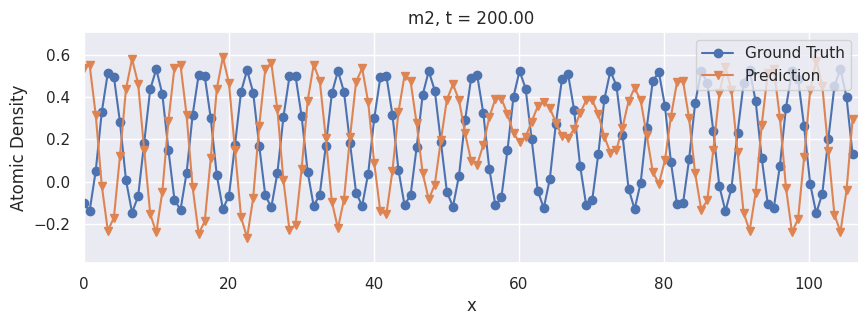

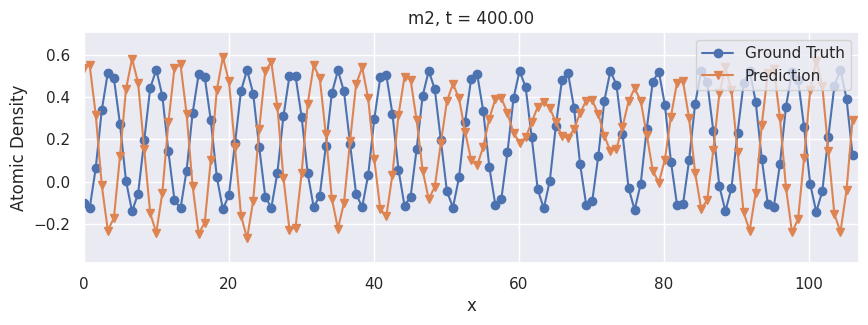

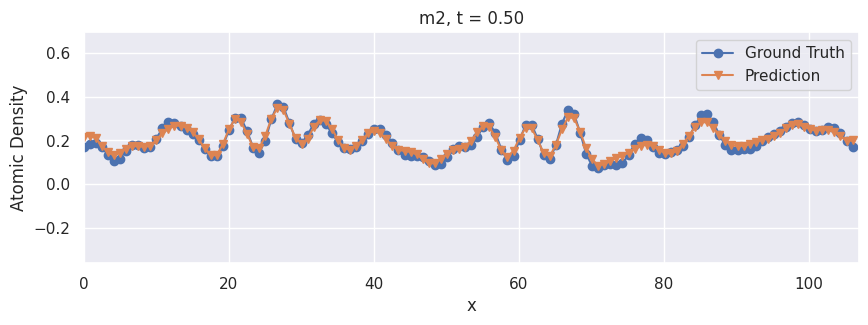

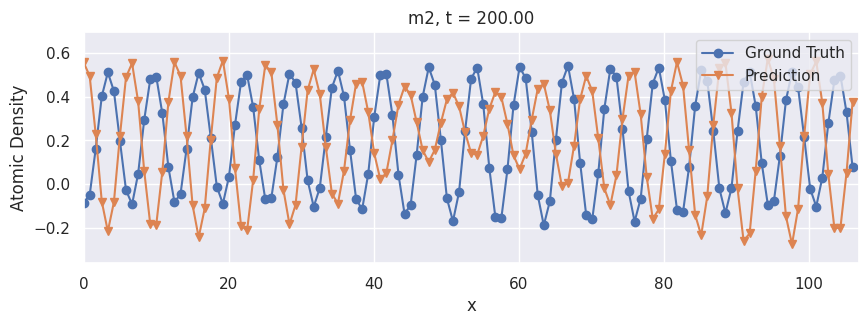

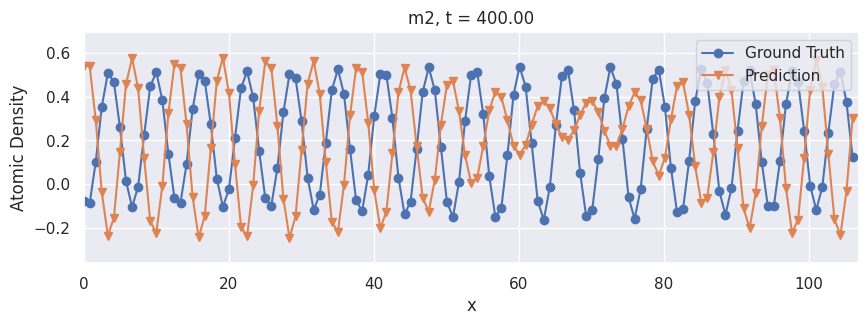

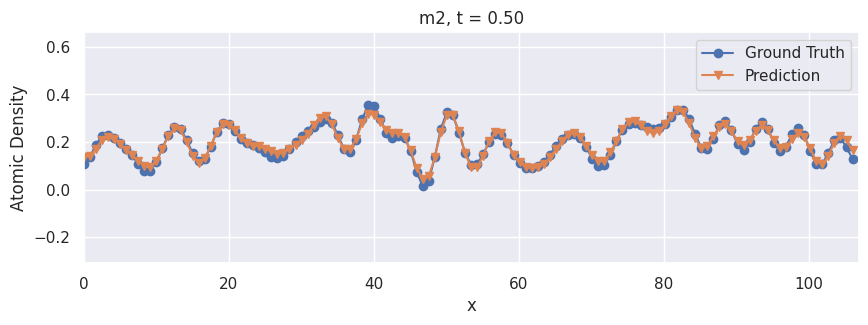

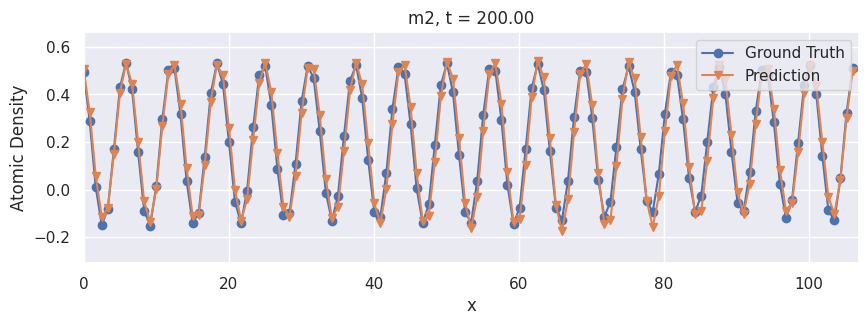

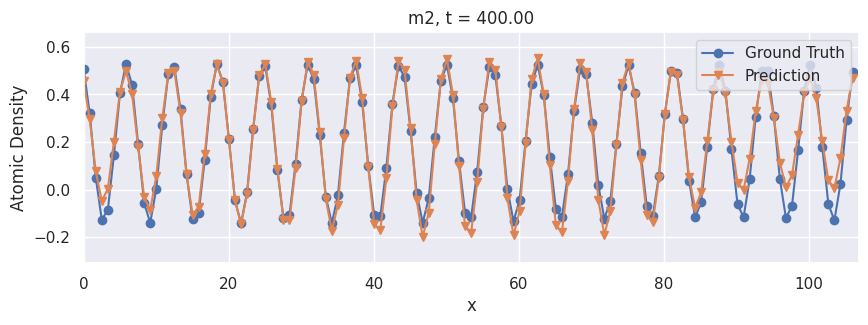

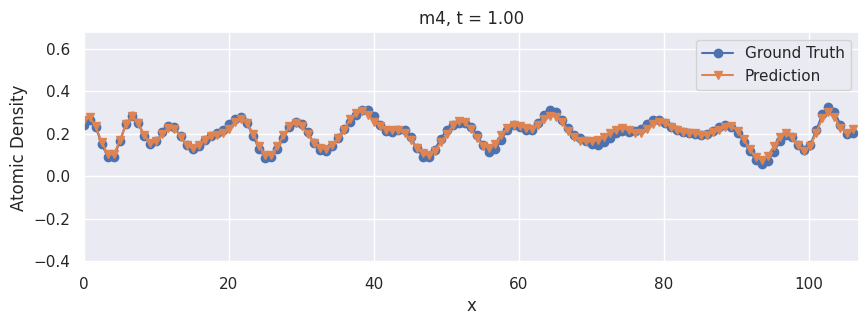

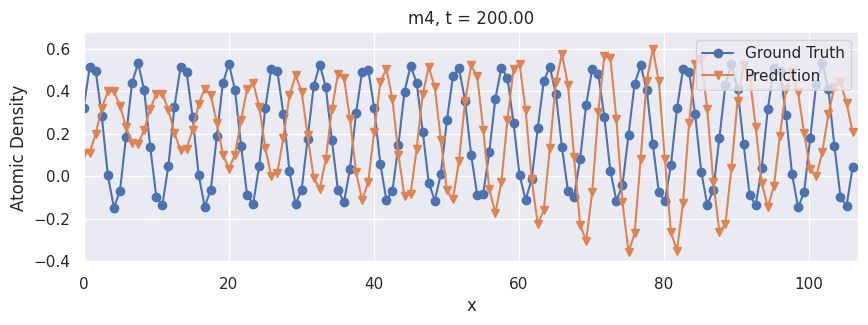

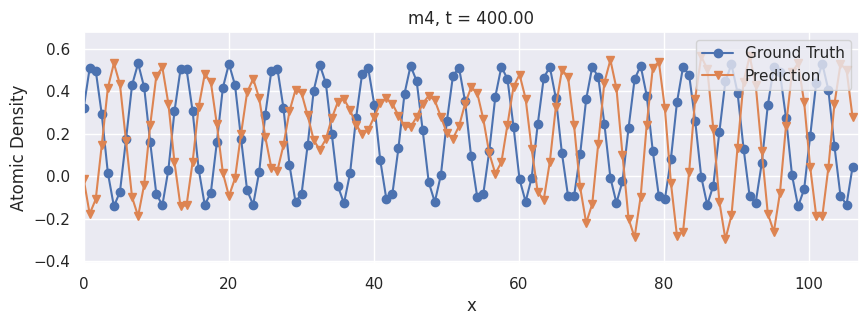

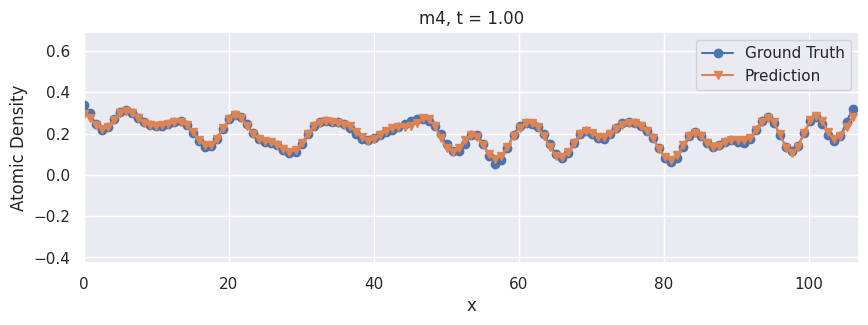

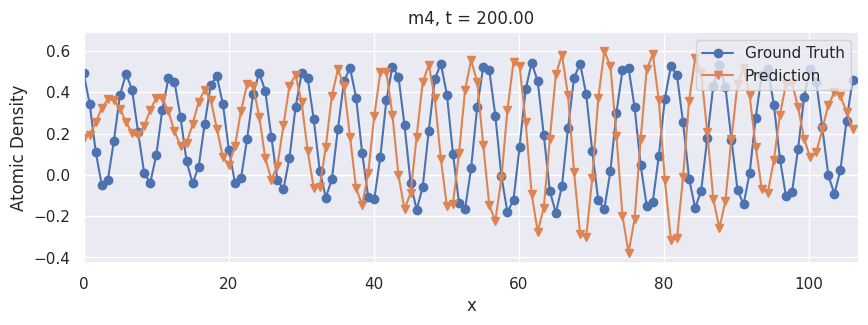

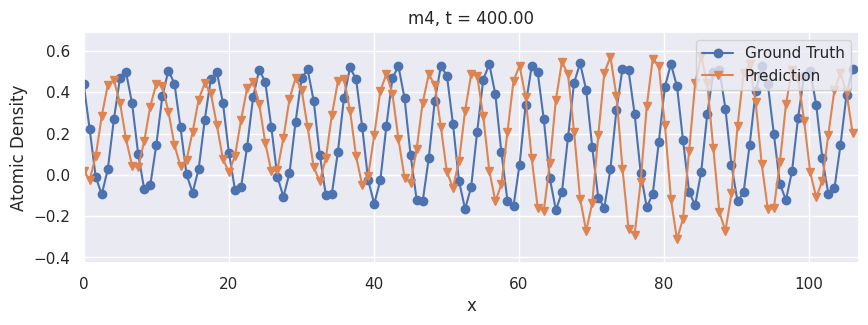

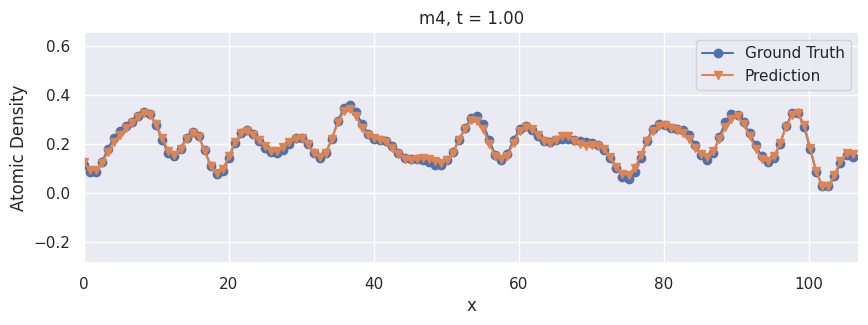

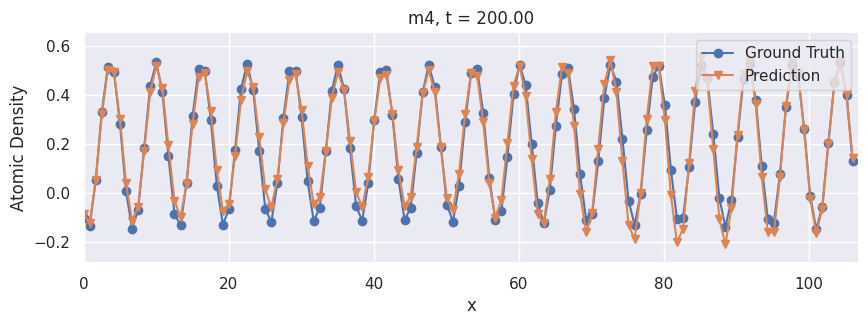

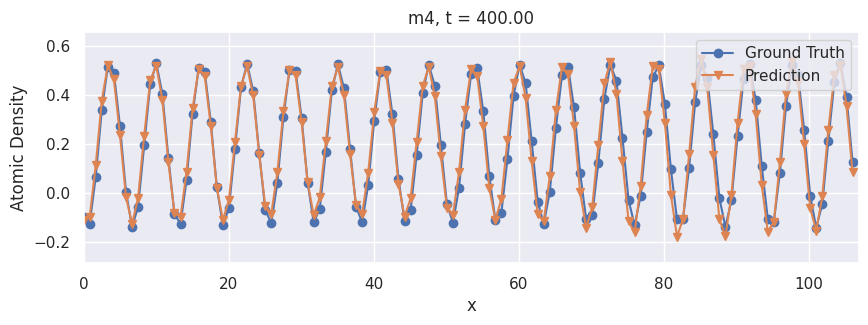

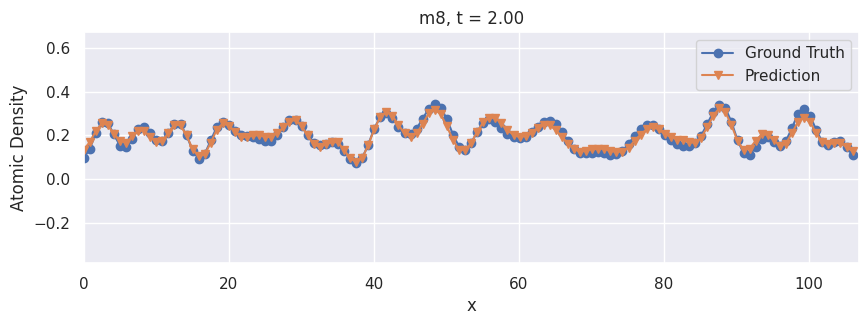

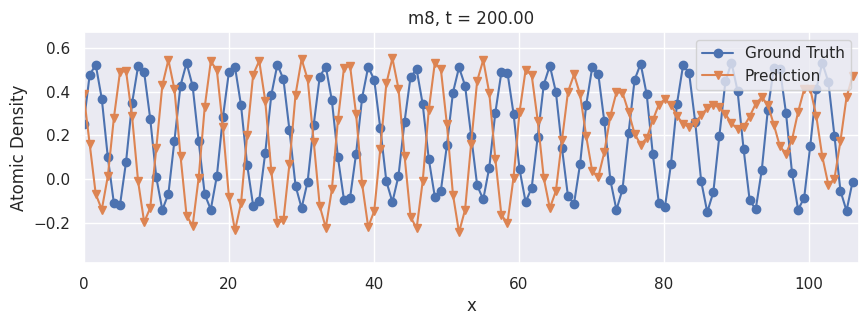

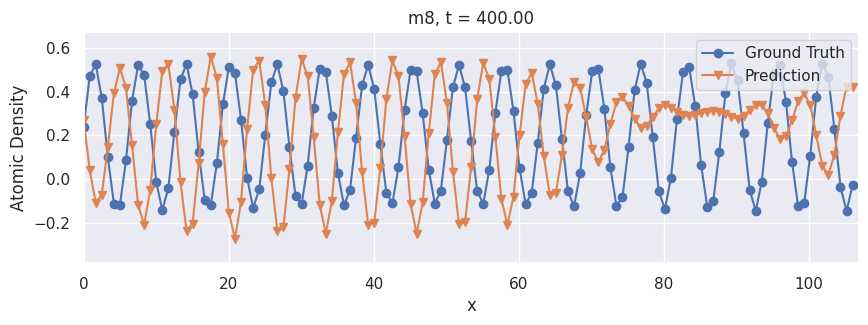

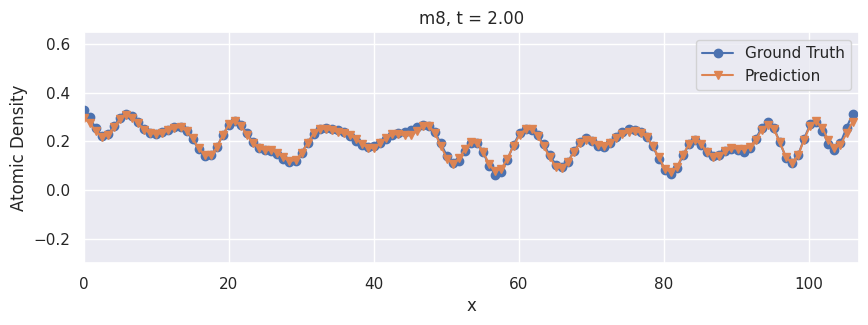

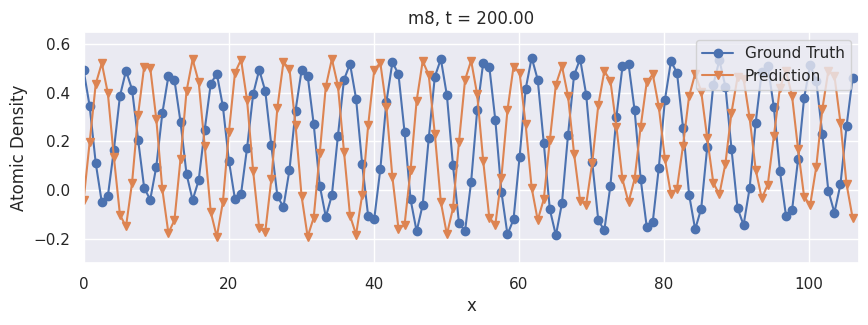

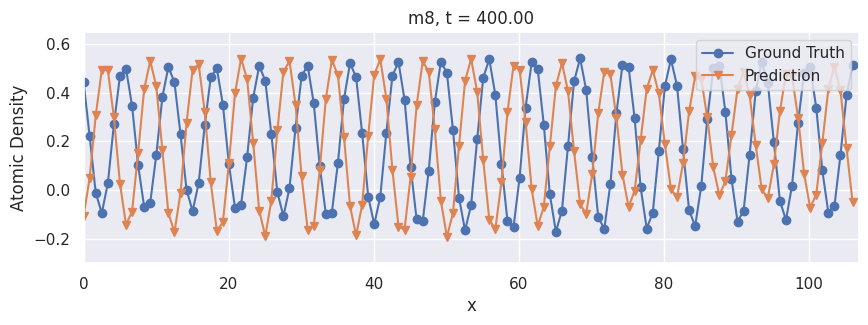

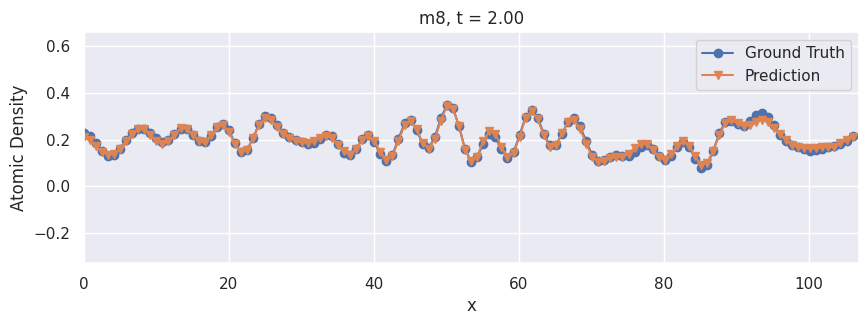

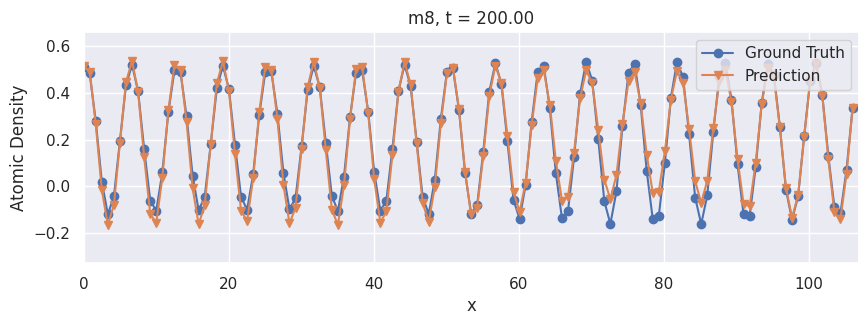

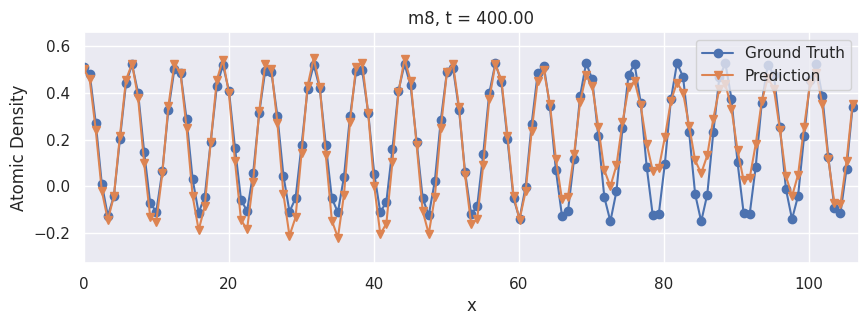

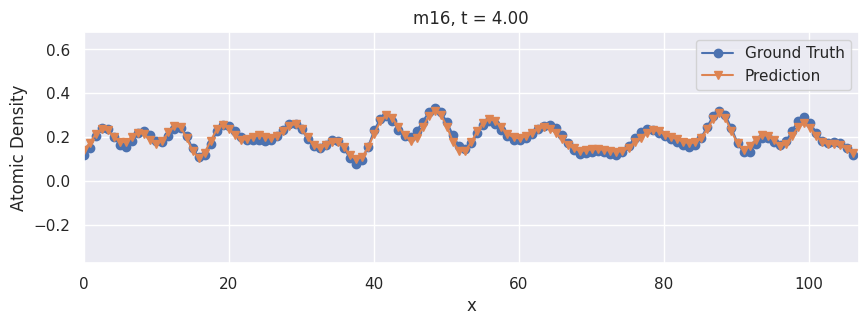

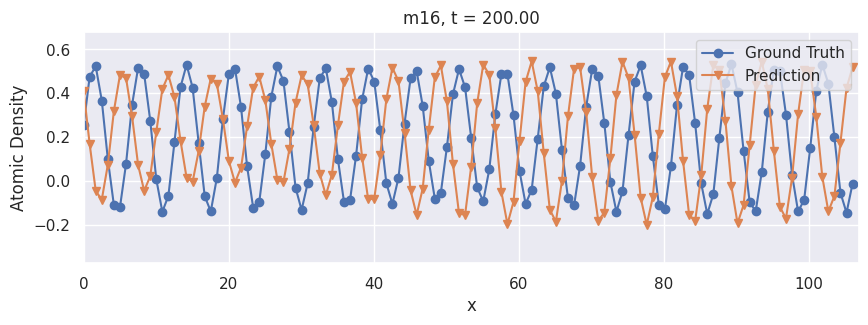

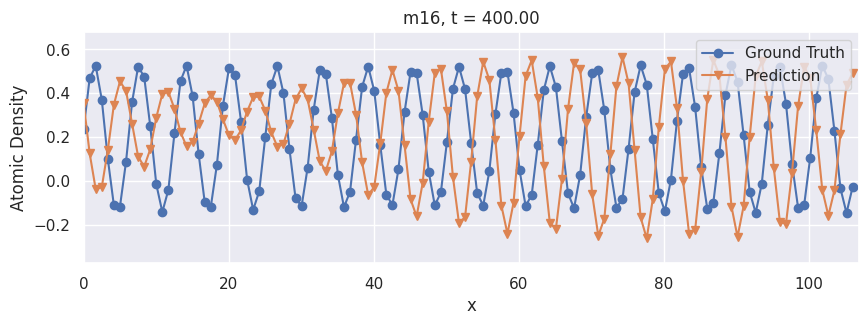

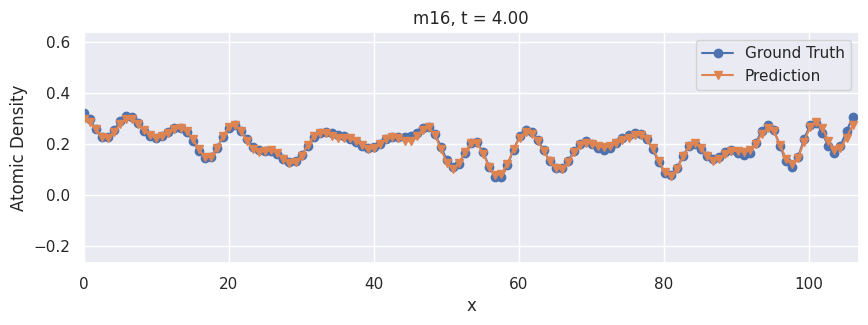

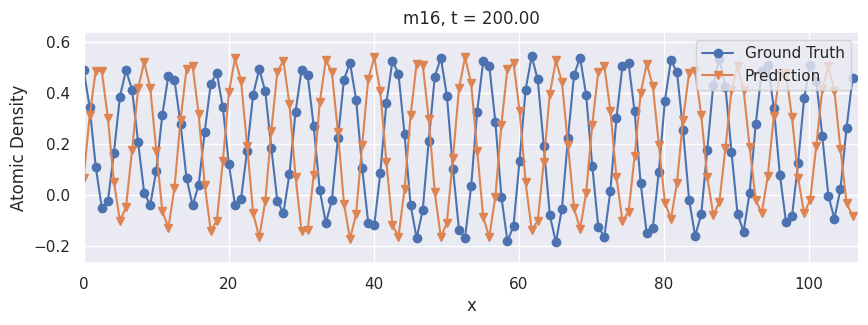

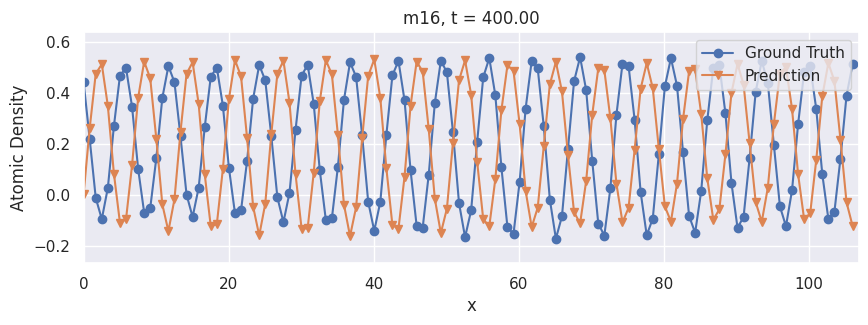

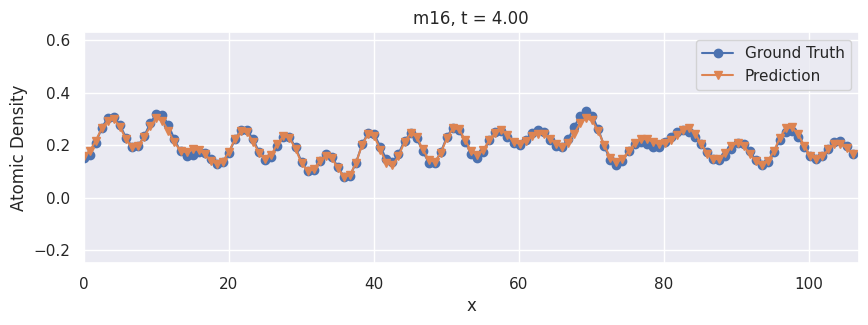

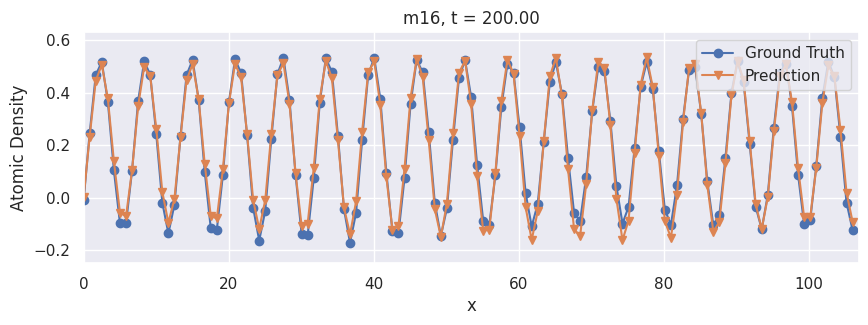

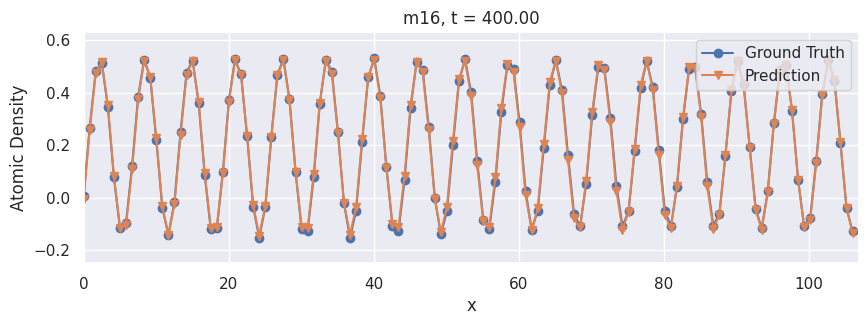

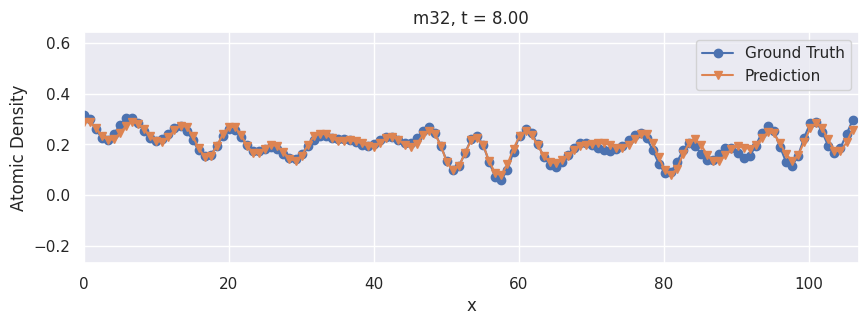

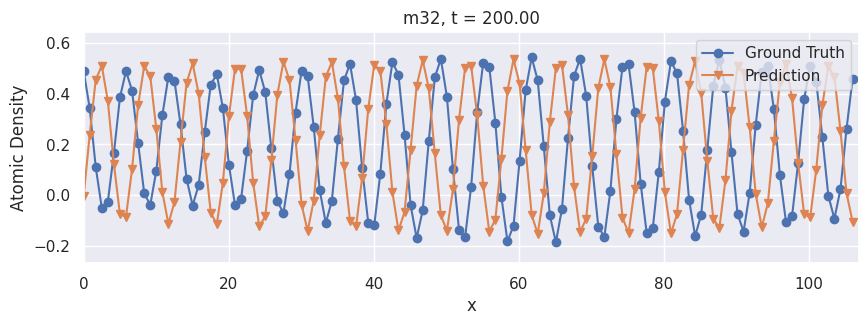

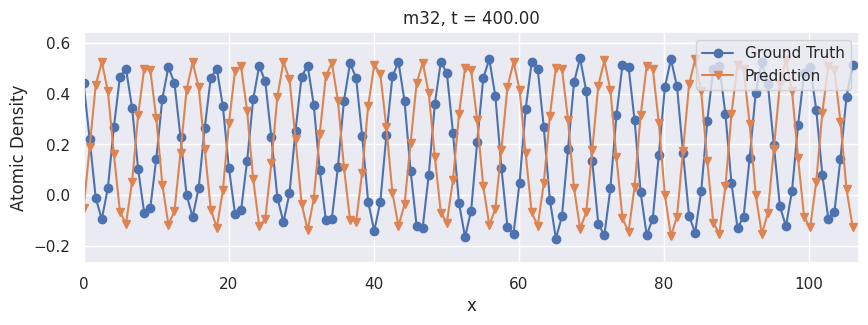

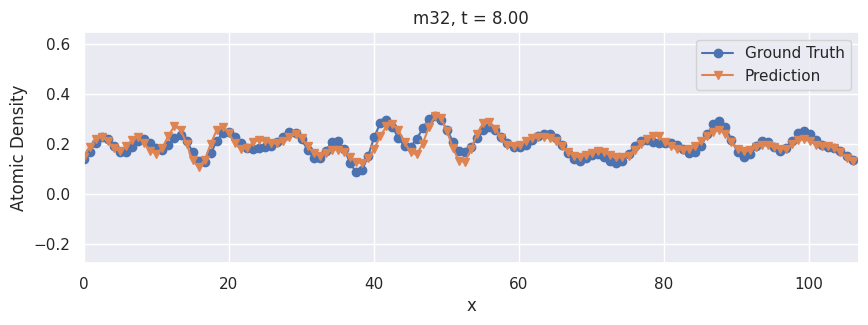

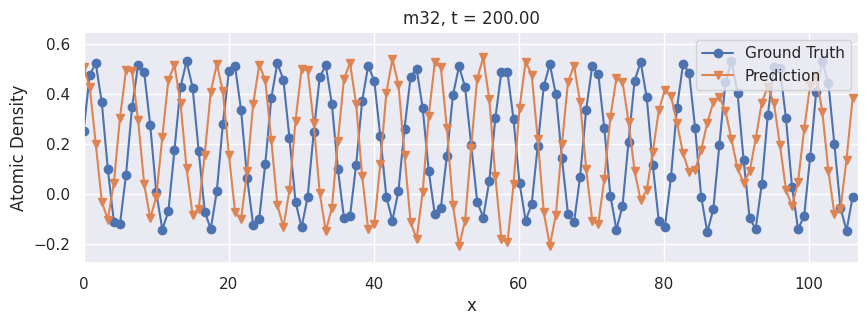

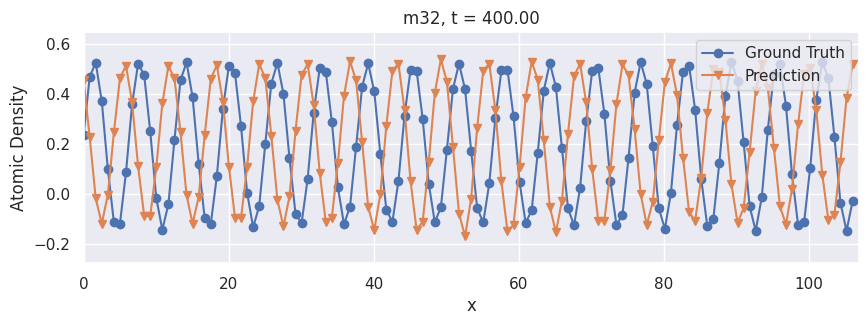

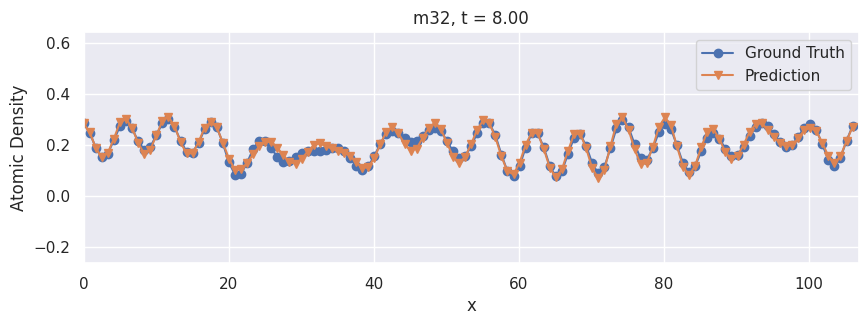

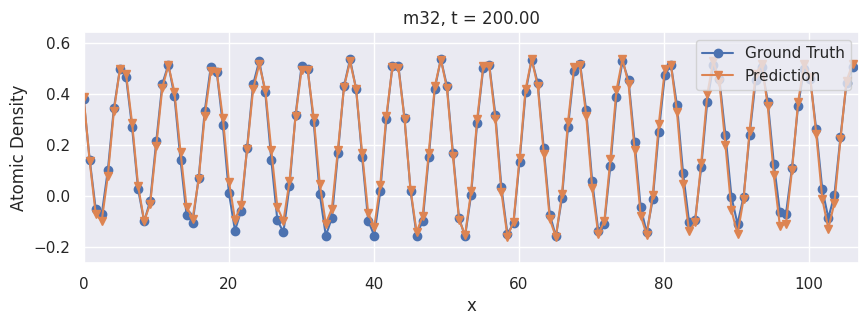

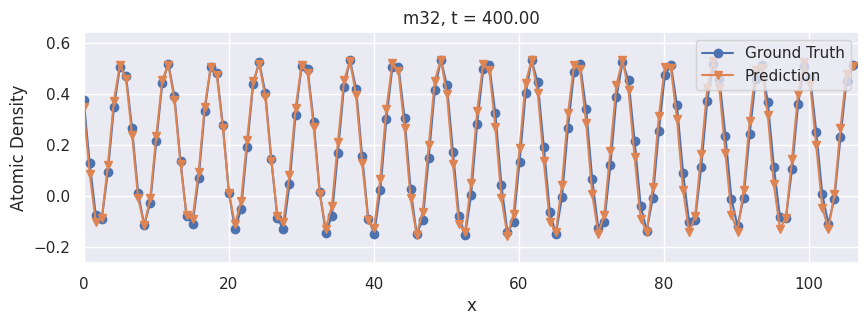

In [16]:
for param in params:
    run_plot(param)